# Heart Failure Prediction Analysis

## by Justin Sierchio

In this analysis, we will be looking at heart failure conditions. Ideally, we would like to be able to answer the following questions:

<ul>
    <li>What patient aspects are most correlated to heart failures?</li>
    <li>Can we predict if a patient will have a heart failure incident?</li>
    <li>What are some other conclusions we might able to draw from this analysis?</li>
</ul>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data/download. More information related to the dataset can be found at: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_HEART = pd.read_csv("heart_failure_clinical_records_dataset.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Display 1st 5 rows from Heart failure dataset
df_HEART.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


As a final step, let's list how the dataset defines each of the terms (using the Kaggle definitions).

<ul>
    <li> age: age of the patient</li>
    <li> anaemia: Decrease of red blood cells or hemoglobin (boolean).</li>
    <li> creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)</li>
    <li> diabetes: If the patient has diabetes (boolean)</li>
    <li> election_fraction: Percentage of blood leaving the heart at each contraction (percentage).</li>
    <li> high_blood_pressure: If the patient has hypertension (boolean).</li>
    <li> platelets: Platelets in the blood (kiloplatelets/mL)</li>
    <li> serum_creatinine: Level of serum creatinine in the blood (mg/dL)</li>
    <li> serum_sodium: Level of serum sodium in the blood (mEq/L)</li>
    <li> sex: female (0) or male (1).</li>
    <li> smoking: If the patient smokes or not (boolean)</li>
    <li> time: Follow-up period (days). </li>
    <li> DEATH_EVENT: If the patient deceased during the follow-up period (boolean). </li>

## Data Cleaning

Let's first make sure that the data is sufficiently cleaned for analysis.

In [4]:
# Find the shape of the data
df_HEART.shape

(299, 13)

So we can see that we have 299 different patients and 13 variables to view. Let's make sure that the dataset is actually complete.

In [5]:
# Find and 'NaN' or 'null' values
df_HEART.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

As we can see, the dataset is complete and has values for every row and column.

## Exploratory Data Analysis

Let's now perform some exploratory data analysis. For example, let's plot the distribution of the patient ages in the dataset.

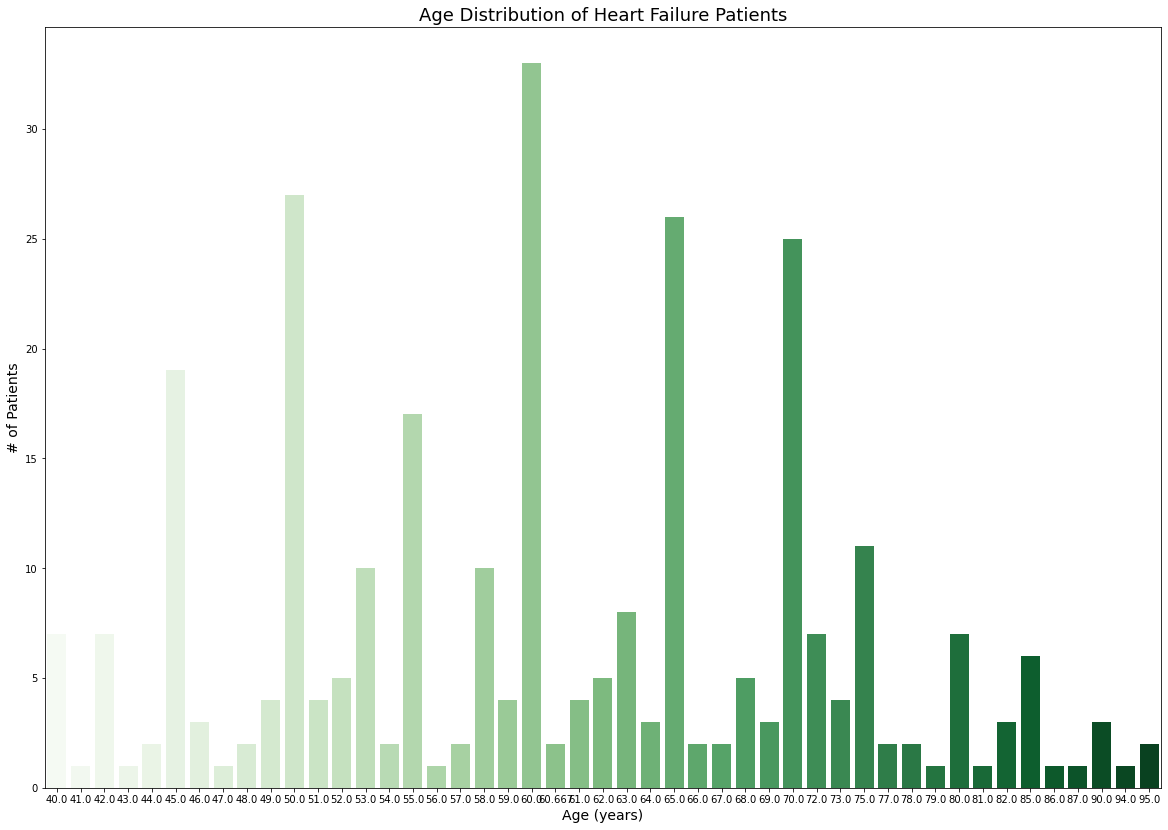

In [6]:
# Create a plot for age distribution of patients

# Sort the incidents by age
df_HEART_1 = df_HEART['age'].value_counts() 
df_HEART1_AgeIndex = df_HEART_1.index 
df_HEART1_AgeValues = df_HEART_1.values

# Name axes for plotting
x = df_HEART1_AgeIndex
y = df_HEART1_AgeValues

# Plot the data for sightings by hour of day
plt.figure(figsize=(20,14))
plt.title('Age Distribution of Heart Failure Patients', fontsize=18)
plt.xlabel("Age (years)", fontsize=14)
plt.ylabel("# of Patients", fontsize=14)
UFOTimeOfDayPlot = sns.barplot(x = x[:60], y = y[:60], palette = 'Greens')

As we can see, the dataset is fairly randomized, with a mean around age 60. Now let's look at how many patients had underlying conditions, such as diabetes or smoking.

Text(0.5, 0, 'Did Patients Have Diabetes? Yes (1) or No (0)')

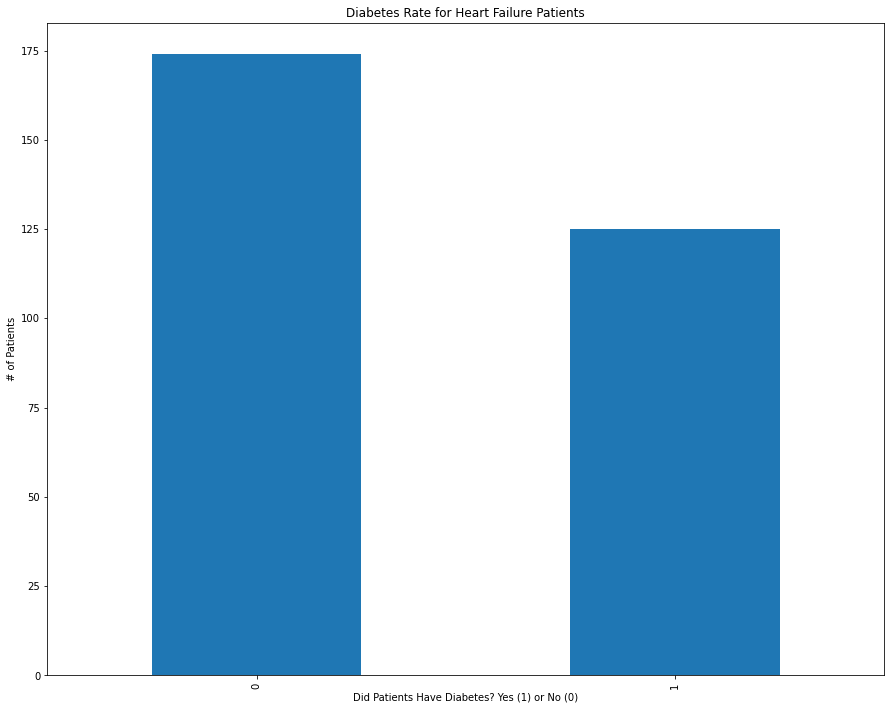

In [7]:
# Diabetes Rate for Heart Failure Patients
plt.figure(figsize=(15,12))
df_HEART['diabetes'].value_counts()[:20].plot(kind='bar')
plt.title('Diabetes Rate for Heart Failure Patients')
plt.ylabel('# of Patients')
plt.xlabel('Did Patients Have Diabetes? Yes (1) or No (0)')

According to the plot, the majority of patients did not have diabetes. What about smoking?

Text(0.5, 0, 'Did Patients Smoke? Yes (1) or No (0)')

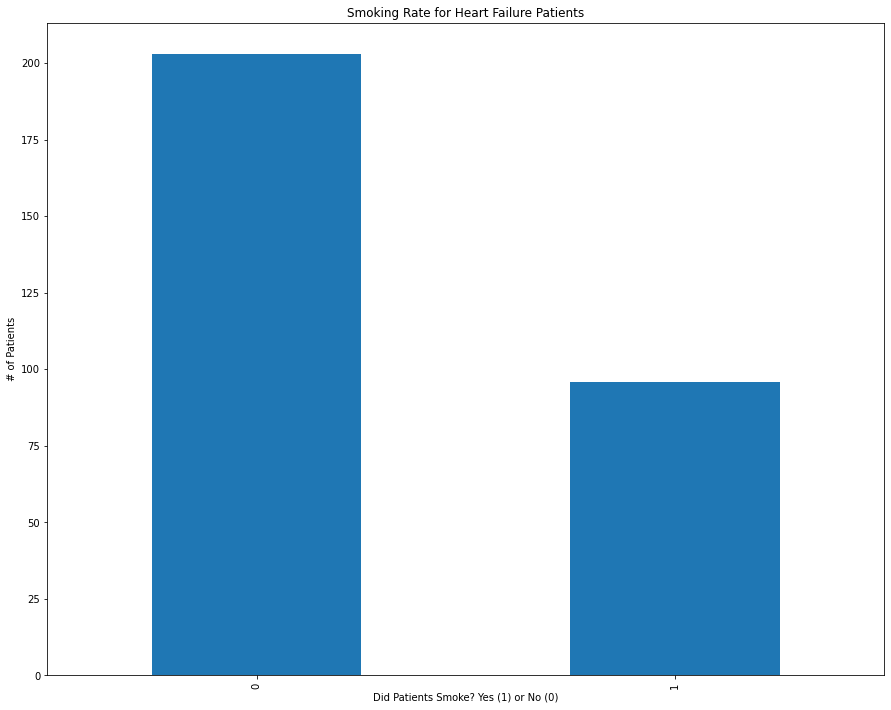

In [8]:
# Smoking Rate for Heart Failure Patients
plt.figure(figsize=(15,12))
df_HEART['smoking'].value_counts()[:20].plot(kind='bar')
plt.title('Smoking Rate for Heart Failure Patients')
plt.ylabel('# of Patients')
plt.xlabel('Did Patients Smoke? Yes (1) or No (0)')

According to the plot, almost two-thirds of the patients did not smoke. Finally, let's look at high blood pressure.

Text(0.5, 0, 'Did Patients Have HBR? Yes (1) or No (0)')

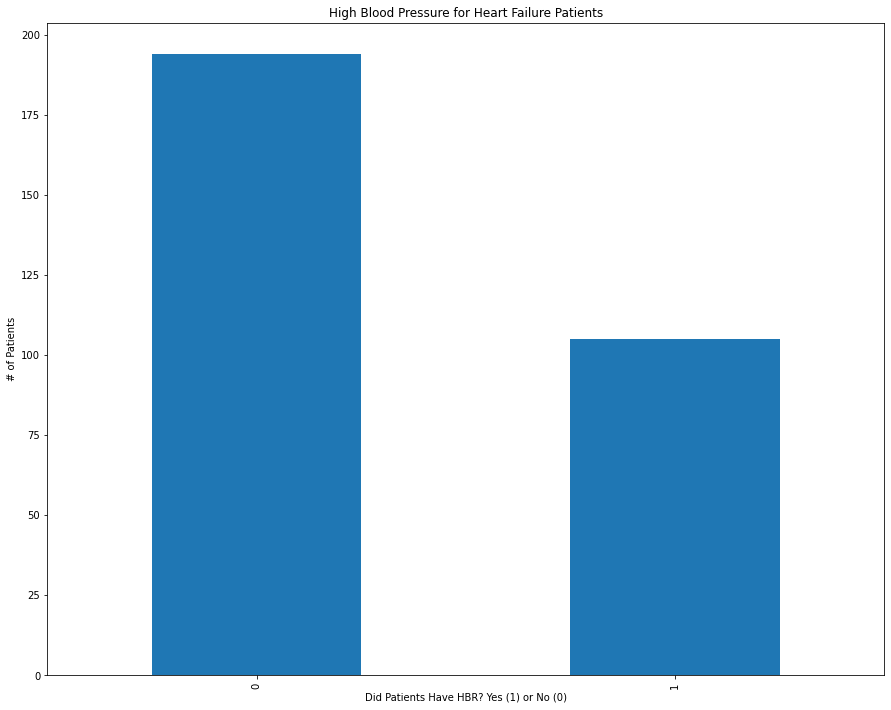

In [9]:
# HBR for Heart Failure Patients
plt.figure(figsize=(15,12))
df_HEART['high_blood_pressure'].value_counts()[:20].plot(kind='bar')
plt.title('High Blood Pressure for Heart Failure Patients')
plt.ylabel('# of Patients')
plt.xlabel('Did Patients Have HBR? Yes (1) or No (0)')

Again, roughly two-thirds of patients did not have high blood pressure. At this juncture, let's use a heatmap to see if there are any hidden relationships in this dataset.

Text(0.5, 1.0, 'Heart Failure Condition Correlation Matrix')

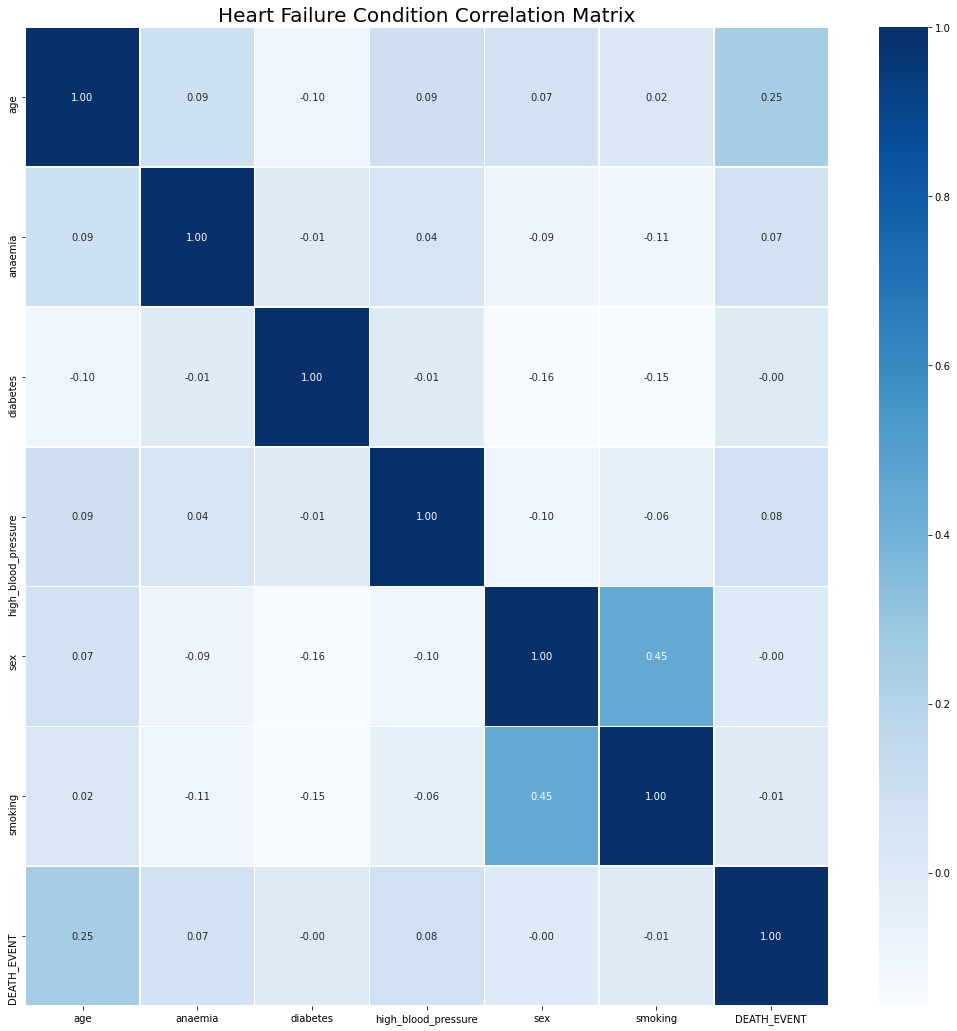

In [10]:
# Heart Failure Condition Matrix
# Select the features to do the analysis
df_HEART_fs1 = df_HEART[['age', 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']]

#  QEfficiency and Turnovers vs. Tournament Performance Matrix
figureHFC, axisHFC = plt.subplots(figsize=(18, 18));
sns.heatmap(df_HEART_fs1.corr(), annot = True, linewidths = .5, fmt = '.02f', ax = axisHFC, cmap="Blues");

plt.title('Heart Failure Condition Correlation Matrix', fontsize = 20)

As we can see from the heatmap above, there are several observations that we can make.

<ul>
    <li>Death events are related to age. A possible reason is that the older the patient, the likelihood of death increases.</li>
    <li>Smoking is related to sex. A possible reason is that men are more likely to smoke as women.</li>
    <li>High blood pressure is slightly related to age. This observation confirms what is already known in the medical community.</li>
</ul>

## Machine Learning Prediction

The final part of this project is to see if we can predict with any accuracy whether or not a patient will have a heart failure incident. Before we start, we need to load a few additional libraries into the workspace.

In [11]:
# Import Machine Learning Libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Import Machine Learning Metrics
from sklearn.metrics import jaccard_score, f1_score, precision_score, recall_score

print('Machine Learning Libraries loaded into workspace!')

Machine Learning Libraries loaded into workspace!


To begin, let's determine how many deaths occurred in this dataset.

In [12]:
# Determine number of death events in the dataset
df_HEART['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

As we can see, approximately 1/3 (96 out of 299) patients died during a heart failure event. Let's begin by creating our feature set.

In [13]:
# Normalize Feature Selection subset using the Standard Scaler and Fit
df_HEART_FS = df_HEART[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT']]
df_HEART_ML = df_HEART_FS.drop(['DEATH_EVENT'],axis=1)
df_HEART_ML = preprocessing.StandardScaler().fit(df_HEART_ML).transform(df_HEART_ML)

# Display the Normalized Set, setting the Machine Learning Set to 'X' to incorporate into the 'TrainX, TestY' methodology
X = df_HEART_ML;
X[0:5]

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04,
        -8.47579380e-01, -1.53055953e+00,  1.35927151e+00,
         1.68164843e-02,  4.90056987e-01, -1.50403612e+00,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00,
        -8.47579380e-01, -7.07675018e-03, -7.35688190e-01,
         7.53566018e-09, -2.84552352e-01, -1.41976151e-01,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01,
        -8.47579380e-01, -1.53055953e+00, -7.35688190e-01,
        -1.03807313e+00, -9.09000174e-02, -1.73104612e+00,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       [-9.12335403e-01,  1.14796753e+00, -4.86071002e-01,
        -8.47579380e-01, -1.53055953e+00, -7.35688190e-01,
        -5.46474088e-01,  4.90056987e-01,  8.50338444e-02,
         7.35688190e-01, -6.87681906e-01, -1.59078490e+00],
       [ 3.50832977e-01,  1.14796753e+00, -4.3548586

Now let's create our target variable based on 'DEATH_EVENT'.

In [14]:
# Create the Target Value Variable
df_HEART_Target = df_HEART_FS['DEATH_EVENT'].values

# Dsplay the Target Value Set
y = df_HEART_Target;
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

Now let's create the training and test sets for our algorithms.

In [15]:
# Create Training and Test Sets
X_train , X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=10)

# Display the Training Set
print ('Train set:', X_train.shape,  y_train.shape)

# Display the Test Set
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (239, 12) (239,)
Test set: (60, 12) (60,)


At this juncture, we can look at a few different algorithms, including K-Nearest Neighbor, Support Vector Machine, Decision Trees and Logistic Regression.